# Решения задания к уроку 2

__Задача 1__

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите `M(X)`, `D(X)`.


__Решение__

$ n = 5\,$, то есть имеется 5 вопросов на которые надо ответить

$ p = \frac{1}{4}\, $, то есть дано 4 варианта ответов и только один из них правильный, вероятность угадать правильный равен $\frac{1}{4}$

$ k = [0,1,2,3,4,5]\,$, возможные исходы угаданных былетов 

Рассчитаем вероятность каждого исхода по формуле Бернулли:

$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def combinations(n,k): #функция вычисления числа комбинаций
  return int(np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k)))
  
def ber(n,k,p): # функция вычисления вероятности по формуле Бернулли
  return combinations(n,k)*p**k*(1-p)**(n-k)

In [3]:
# Определим векторную функцию вычисления вероятности по формуле Бернулли:
def pber(k):
  n = 5
  p = 1/4
  return ber(n,k,p)
pvec = np.vectorize(pber)

In [ ]:
x = np.arange(6) # возможные исходы
px = pvec(x) # вероятности возможных исходов
for i in range(6):
  print (x[i], '\t',px[i])

0 	 0.2373046875
1 	 0.3955078125
2 	 0.263671875
3 	 0.087890625
4 	 0.0146484375
5 	 0.0009765625


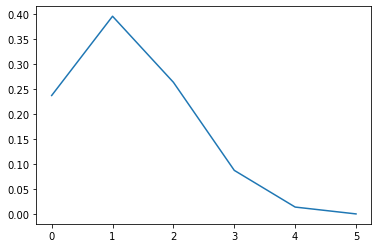

In [ ]:
import matplotlib.pyplot as plt
plt.plot(px)

In [ ]:
# матожидание m
m = (x*px).sum()
# дисперсия d
d = ((x-m)**2*px).sum()
m,d

(1.25, 0.9375)

Также математическое ожидание и дисперсию для биномиально распределённой дискретной величины можно вычислить по формулам:
$$M(X) = np, \: D(X) = np(1 - p).$$

То есть:

$$M(X) = np = 5 * \frac{1}{4} = \frac{5}{4} = 1.25 $$ 
$$ D(X) = np(1 - p) =  \frac{5}{4} * ( 1 - \frac{1}{4})  = \frac{15}{16} = 0.9375$$




__Задача 2__

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число `N`, такое, что с вероятностью 0.95 пользователь получит не более `N` писем со спамом за текущий день.



__Решение__
Воспользуемся формулой Пуассона:
$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

в нашем случае $ \lambda = 10 $, и нам необходимо найти такое $k $, чтобы $P(X \leq k) =  \displaystyle\sum_{i = 0}^{k} \dfrac{\lambda^k e^{-\lambda}}{k!} \geq 0.95 $

In [6]:
def pois (k, lamb): # Формула Пуассона
  return (lamb** k) * (np.exp(-lamb)) / np.math.factorial(k)


In [13]:
p = 0.95 # требуемая вероятность
lamb = 10 

n = -1 # начальное приближение числа N
pp = 0
while  pp < p:
  n += 1
  pp += pois(n, lamb)
print(f'Пользователь получит не более N = {n} писем со спамом за текущий день вероятностью {pp}')


Пользователь получит не более N = 15 писем со спамом за текущий день вероятностью 0.9512595966960214


__Задача 3__

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

_Подсказка_. 1) "Вероятность попасть `k` раз при `n` выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность `P(X >= k)`, а не `P(X = k)`? 3) Здесь предстоит немножко покодить.

__Решение__

Вероятность попасть $k$ раз из $n$ выстрелов при вероятности попасть $p$ рассчитывается по формуле Бернулли:

$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

Нам необходимо найти такое количество $n$,  при котором с вероятности попали хотя бы 6 раз, это значит необходимо рассчитывать вероятность для все к >=6.

Но можно посчитать вероятность для к < 6

Тогда $$P(X \geq k) = 1 - P(X < k)$$

Следовательно нам надо найти такое $n$ при котором 

$$P(X \geq k) = 1 - P(X < k) = 1 - \sum_{i=0}^{k-1}C_n^k p^k (1 - p)^{n - k} \leq 0.9$$


In [ ]:
q = 0.9 # требуемая вероятность
p = 0.01 # вероятность попадания при выстреле
k = 6 # количество попаданий
n = k-1
pn = 1
while (1-pn) < q:
  n += 1
  pn = sum(ber(n,i,p) for i in range(k))

print(f'Необходимо сделать {n} выстрелов чтобы быть уверенным с вероятностью {q}, что хотя бы {k} раз будет совершено попадание')

Необходимо сделать 926 выстрелов чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание


__Альтернатичное решение__

(я понимаю что  здесь логика другая и возможно это решение другой задачи, но 
рассуждение логичное)

Допустим у наc есть событие А, которое происходит с вероятностью $p$ тогда при 6 независимых испытаний в которых произойдут события А 6 раз будет с вероятность $p^6$ 

Рассмотрим Геометрическое распределение. 

Полная вероятность до первого наступления событий:

$$P = \sum_{i = 0}^k(1 - p)^i \cdot p$$

$p = 0.01$


Для того чтоб ынайти количество выстрелов  чтобы  с вероятностью 0.9 попасть хотя бы раз в мишень , 
нам необходимо найти такое $k $, чтобы $P =  \sum_{i = 0}^k(1 - p)^i \cdot p \geq 0.9$



In [ ]:
q = 0.9**(1/6) # требуемая вероятность
p = 0.01
n = 1 # начальное приближение числа N

while sum((1-p)**i*p for i in range(n)) < q:
  n += 1
n

404

(Это же число получим если проверить и в предыдущем решении при требуемой вероятности $0.9^{\frac{1}{6}}$ и $ k = 1$)

Теперь мы проводим независимые испытания сериями по 404 выстрела в каждом из которых с вероятностью $0.9^{\frac{1}{6}}$ получаем одно попадание.

Тогда после 6 серий по 404 выстрела мы имеем 6 попаданий с вероятностью $(0.9^{\frac{1}{6}})^6 = 0.9$

То есть с вероятностью 0.9 мы имеем 6 попаданий после 404*6 = 2424 выстрелов


